### 常用阈值方法

更多内容请参考：[OpenCV-Python learning-6.图像算术运算（下）](https://blog.csdn.net/nima1994/article/details/79572225)

In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt

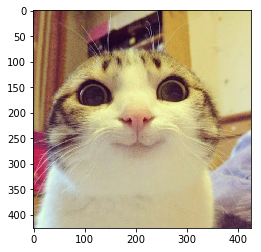

In [2]:
img=cv2.imread("E:\cat.jpg") #bgr模式，默认
img2=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)#转成RGB
plt.imshow(img2)

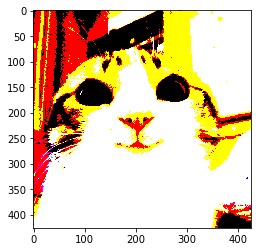

In [3]:
ret,thresh1 = cv2.threshold(img2,127,255,cv2.THRESH_BINARY) # 低于阈值的像素点灰度值置为0；高于阈值的值置为参数3
plt.imshow(thresh1)

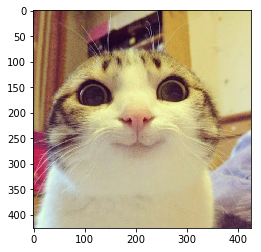

In [4]:
plt.imshow(img2)

In [5]:
img3=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #用灰度图像

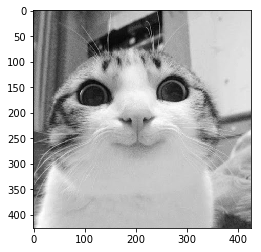

In [6]:
plt.imshow(img3,cmap='gray')

In [7]:
ret,thresh2 = cv2.threshold(img3,127,255,cv2.THRESH_BINARY)

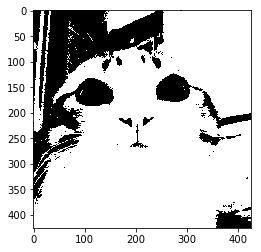

In [8]:
plt.imshow(thresh2,cmap='gray')

### 自适应阈值

即对图像不同区域使用不同的阈值。

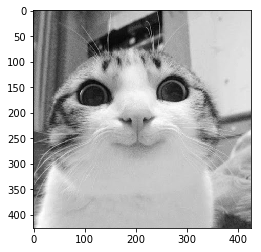

In [9]:
plt.imshow(img3,cmap='gray')

In [10]:
thresh3 = cv2.adaptiveThreshold(img3,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2) #阈值是邻域的平均值

In [11]:
#第二个参数和第四个参数：参见threshold()前文所述
#第三个参数：阈值是邻域的平均值，必须为奇数
#第五个参数：阈值窗口大小
# 第六个参数：阈值窗口所得值减去的常数

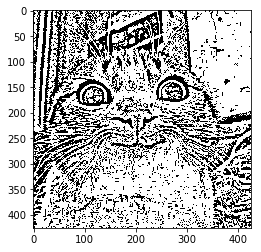

In [12]:
plt.imshow(thresh3,cmap='gray')

In [13]:
thresh4 = cv2.adaptiveThreshold(img3,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
#领域内像素点加权和或称高斯均值，权重为一个高斯窗口

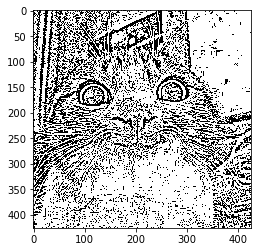

In [14]:
plt.imshow(thresh4,cmap='gray')

#### 应用：将学生作业的照片变得更清晰？

### Otsu(大津法)

最大类间方差法是一种自适应的阈值确定的方法,又叫大津法,简称OTSU。它是按图像的灰度特性,将图像分成背景和目标2部分。背景和目标之间的类间方差越大,说明构成图像的2部分的差别越大,当部分目标错分为背景或部分背景错分为目标都会导致2部
分差别变小。因此,使类间方差最大的分割意味着错分概率最小。[引用](http://blog.sina.com.cn/s/blog_9edd4b8301013zu8.html)

大津法的优点在于可以快速有效的找到类间分割阈值(目的)，缺点是只能针对单一目标分割，或者感兴趣的目标都属于同一灰度范围，若需探测目标灰度范围分布较大，则必将有一部分目标探测丢失，且基于局部阈值分割出的目标连结性较差，包含噪声。

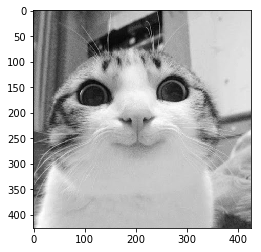

In [15]:
plt.imshow(img3,cmap='gray')

In [16]:
blur=cv2.GaussianBlur(img3,(5,5),0) #高斯滤波，低通滤波器；第二个参数表示高斯矩阵窗口，第三个为标准差

[高斯模糊原理](http://www.ruanyifeng.com/blog/2012/11/gaussian_blur.html)

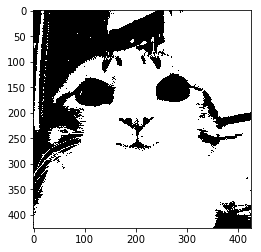

In [17]:
ret5,th5 = cv2.threshold(img3,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)#使用灰度图像img3
plt.imshow(th5,cmap='gray')

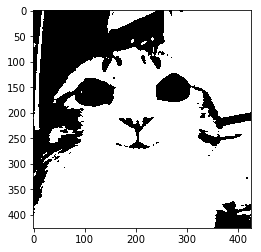

In [18]:
ret6,th6 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)# 使用img3滤波降噪后图像
plt.imshow(th6,cmap='gray')

#### 应用：手写字体预处理？